<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Trabalho_1_Quest_2_RIDGE_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> C) AR + Ridge Regression <h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from math import log
from sklearn.preprocessing import StandardScaler

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [4]:
CPI.shape

(758, 3)

In [5]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [6]:
data.shape

(759, 104)

CPI series has already been differentiated.

In [7]:
data = data.drop([758])

In [8]:
data.isna().sum()

sasdate            0
RPI                0
W875RX1            0
DPCERA3M086SBEA    0
RETAILx            0
                  ..
DSERRG3M086SBEA    0
CES0600000008      0
CES2000000008      0
CES3000000008      0
INVEST             0
Length: 104, dtype: int64

In [9]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [10]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [11]:
data.shape, CPI.shape

((758, 104), (758, 3))

In [12]:
data = data.drop(columns = ["sasdate"]).reset_index(drop=True)

In [13]:
data.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.0223

In [14]:
CPI_data = CPI.merge(data, left_index = True, right_index = True, how = "left")

In [15]:
CPI_data.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-03-01,-0.001036,-0.000691,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-04-01,0.000345,0.001381,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-05-01,0.002066,0.001721,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-06-01,0.002405,0.000339,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,

In [16]:
date = CPI_data["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-03-01
1,1959-04-01
2,1959-05-01
3,1959-06-01
4,1959-07-01
...,...
753,2021-12-01
754,2022-01-01
755,2022-02-01
756,2022-03-01


In [17]:
CPI_data = CPI_data.drop(columns = ["sasdate", "CPIAUCSL"])

Let's check the variance distribution for each variable.

(array([1.21118846e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17591112e-05]),
 array([3.55130748e-10, 8.17696545e+02, 1.63539309e+03, 2.45308963e+03,
        3.27078618e+03, 4.08848272e+03, 4.90617927e+03, 5.72387581e+03,
        6.54157236e+03, 7.35926890e+03, 8.17696545e+03, 8.99466199e+03,
        9.81235853e+03, 1.06300551e+04, 1.14477516e+04, 1.22654482e+04]),
 <a list of 15 Patch objects>)

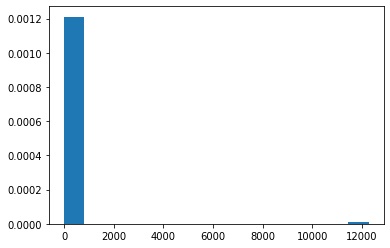

In [18]:
plt.hist(CPI_data.var(), density = True, bins = 15)

We can see that variables have much different variances, so we need to standardize all variables.
Below is the distribution of standardized variables.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.5       , 0.56666667, 0.63333333, 0.7       , 0.76666667,
        0.83333333, 0.9       , 0.96666667, 1.03333333, 1.1       ,
        1.16666667, 1.23333333, 1.3       , 1.36666667, 1.43333333,
        1.5       ]),
 <a list of 15 Patch objects>)

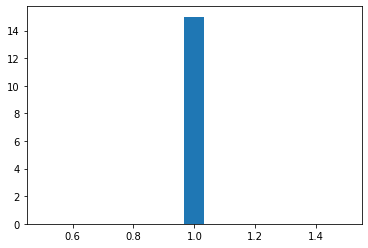

In [19]:
scaler = StandardScaler()
scaler.fit(CPI_data)
CPI_data_st = scaler.transform(CPI_data)
plt.hist(CPI_data_st.var(), density = True, bins = 15)

In [20]:
CPI_data_st = pd.DataFrame(CPI_data_st, columns = CPI_data.columns)
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.258455,0.108583,0.193494,0.906406,0.161428,1.708178,1.151487,0.607606,0.542204,0.090167,1.061919,0.575036,2.326189,2.269714,1.334968,1.395448,-0.139663,-0.712616,1.473948,-1.721245,-0.607043,-0.222529,-0.993786,-0.140494,-0.054644,-1.373790,-0.879914,-1.245373,-0.243808,0.435923,0.737411,-0.660331,-0.520031,1.305124,1.472550,0.718124,0.277493,0.505487,0.434448,0.650888,-0.400881,0.008493,-0.906949,0.684372,-0.648127,0.633820,1.880358,1.445484,-0.611358,0.149388,1.037944,1.901051,-0.037838,-0.218580,0.275844,-0.086402,-0.080429,-27.512535,-0.195628,0.480564,-0.592245,-0.630244,-0.093484,-0.281388,0.109777,0.447258,-0.150965,-0.211325,0.096329,0.098385,1.010108,1.326117,1.386022,0.606254,0.299797,-0.182066,-0.298562,0.093097,0.063242,0.093762,0.567089,-0.349974,-0.415682,-0.293982,-0.321401,-0.201599,-0.418018,-0.259179,-0.217700,-0.126516,-0.346324,-0.294710,-0.065931,-0.569256,-0.480858,-0.565951,-0.592904,-0.441750,-0.330511,-0.656172,0.026664,-0.265273,0.008753,-0.277803
1,0.511228,0.313990,0.805420,0.794293,0.225398,1.206603,0.409919,0.264115,-0.147245,0.526848,-0.780682,0.428611,1.881897,1.926443,1.128413,1.162602,0.127988,1.121675,1.224186,1.596671,1.176390,-0.682139,-0.258032,-0.672483,-0.726815,-0.833848,-0.284880,-1.006813,-0.728833,0.800472,1.413122,0.009849,0.910253,1.584521,1.845901,0.716290,0.428575,0.770772,0.685774,1.179223,1.078754,0.188542,-0.445148,1.384444,-0.512974,0.540381,1.766551,1.139111,-0.644327,0.374570,0.457942,1.946206,-0.037990,-0.146780,0.628604,-0.142053,-0.083000,0.036293,-0.186410,-0.180152,0.540046,0.518778,0.742048,0.248350,0.007615,0.177921,0.103327,0.119407,-0.041874,-0.185894,0.623251,0.834293,0.989328,0.348965,0.085877,-0.382288,-0.503770,0.172528,0.063242,0.103739,-0.411573,-0.443053,-0.357499,-0.345572,-0.331092,-0.198692,-0.344023,-0.328912,-0.151815,-0.133104,-0.252434,0.110352,-0.580824,-0.569256,-0.480858,-0.565951,-0.612247,-0.399996,-0.327353,-0.610832,0.020776,-0.265273,1.636826,1.843727
2,0.637727,0.319252,0.754672,-0.733718,-0.261991,1.873827,1.245503,1.153644,1.329201,0.125520,1.966389,1.293361,2.010668,1.443524,2.446943,1.645410,0.050800,-0.276023,1.792707,0.894963,0.976084,-0.911944,-0.503283,0.245529,-1.807208,-2.344100,-2.674855,-1.021678,-0.479376,0.734408,1.565568,0.102817,2.083310,1.379051,1.621342,0.573148,0.228769,0.320537,1.065941,-1.216544,0.887185,-0.028888,-0.137281,0.684372,-0.377821,0.479311,1.328302,1.007219,-0.432527,0.473540,0.179135,1.140810,-0.038076,-0.247723,0.002246,-0.124489,-0.080326,0.036595,0.013207,0.448268,0.303225,0.351538,0.324282,0.368745,0.365183,0.275862,0.421194,0.486887,0.464872,0.051005,0.608923,0.807707,0.923212,0.326263,0.067002,-0.413902,-0.578846,0.080792,0.063242,0.110344,-0.506733,-0.443053,-0.357499,-0.345572,-0.321483,-0.201599,-0.399632,-0.259179,-0.218148,-0.828122,-0.346324,-0.294710,-0.070389,-0.238317,-0.480858,-0.565951,-0.445394,-0.417803,-0.328616,-0.119930,0.014970,0.215006,-0.007133,-0.559505
3,0.124012,0.259160,0.684083,1.098180,0.192646,1.270393,0.634680,0.696171,0.302525,0.550100,-0.167456,1.644133,1.865382,1.679344,0.623430,1.015758

In [21]:
CPI_data_st.shape

(758, 104)

In [22]:
CPI_data_n = CPI_data_st.copy()

In [23]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for col in CPI_data_n.columns:
  for i in lags:
    CPI_data_n[col + "_lag_" + str(i)] = CPI_data_n[col].shift(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [24]:
CPI_data_n.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUEL

In [25]:
CPI_data_n.shape

(758, 1352)

In [26]:
CPI_data_n = CPI_data_n.dropna()
CPI_data_n.head()

CPIAUCSL_diff       RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO  \
12      -0.507178 -0.120676 -0.246873         0.199983 -0.067127 -1.082137   
13       1.633489 -0.057688 -0.247010         1.336531 -0.370639 -1.090074   
14      -1.260081  0.066440  0.193645         1.490433  1.337510 -0.986155   
15       0.123193 -0.017262  0.002468        -2.689626 -1.252681 -0.314399   
16      -1.258254 -0.149777 -0.437147        -0.333302 -0.387231 -1.447959   

     IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT  \
12 -0.769906 -0.504828 -1.227607 -0.498429 -1.497280  0.182210 -1.220640   
13 -0.542315 -0.293860 -0.038622 -0.686691  1.015499 -0.065520 -1.502182   
14  0.032327 -0.081781  0.501599 -0.107770  1.150312 -0.807832 -2.070344   
15  0.375340  0.445490  0.390301  0.220519  0.269149 -0.002642 -0.908649   
16 -1.346384 -1.245638 -0.792669 -0.399341 -0.895633 -0.938836 -1.475982   

      IPDMAT    IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV  \
12 -1.047763 -0.652906  -0.856204  -0.098680  0.428691 -1.120904 -0.431782   
13 -1.875123 -0.095712  -1.252220   0.985126  0.423644 -1.614638 -2.924764   
14 -2.113563 -0.876921  -0.869614  -0.028784  1.367487 -1.158711  5.080931   
15 -0.882338 -0.000900  -0.676599  -0.407816 -1.385745 -0.928798 -0.156422   
16 -1.897970 -0.058570  -1.180282   0.109753 -0.277958 -1.471445  1.035377   

      CE16OV    UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  \
12  0.441505 -0.911944 -0.503283 -1.434310  -0.126798 -1.300707  -0.901704   
13 -2.338984  1.386107 -0.135406  1.603146   0.910126  2.006530   2.361663   
14  2.748537 -0.452334 -0.503283  0.424040  -1.281453 -1.049453  -1.123031   
15  0.042496 -0.222529 -0.871160 -0.109381   0.789766 -1.803058  -1.336806   
16  0.071376  0.696691 -0.012780  0.117203   1.092627  1.052191   1.182752   

    UEMP27OV   CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP  \
12 -1.100027 -0.170659  0.503016  0.865660       0.406131  0.865932  0.846157   
13  0.332094  1.176278 -0.415108 -1.831908      -0.116882 -5.512409 -0.565573   
14 -0.289779 -0.265556  0.867993  0.550707       0.309877  3.776643 -0.515637   
15 -1.396846  0.513572 -1.270501 -0.585514      -0.544638  0.410424 -0.789861   
16  0.230898  0.127908 -0.624852 -1.076944      -0.285712 -0.795187 -1.110487   

     DMANEMP  NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE  \
12  0.973654  0.391199  0.302488  0.361504  0.196037  0.428635  1.022516   
13 -0.771230  0.043028  0.529708 -0.477481  0.141826 -0.349042  0.479925   
14 -0.804027  0.286529  1.061726  2.560335  0.811230  2.402287  0.476442   
15 -1.006339 -0.130878 -1.563144 -2.363371 -0.902074 -2.193190 -0.237978   
16 -1.270356 -0.549461 -0.265044 -0.424636 -0.700689 -0.268232  0.116585   

      USGOVT  CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW  \
12  0.281073      -0.906949 -1.415846 -0.648127  0.295465  1.275277  0.957409   
13  6.545473      -1.214816 -0.715773 -1.053585 -0.697767 -0.193646 -0.536824   
14 -0.079916      -0.753015 -2.815991 -1.053585 -0.206360  0.769976  0.270540   
15 -3.920241      -1.060883  2.084516 -0.918432 -0.252305  0.736668  0.352782   
16 -0.389730      -1.214816 -1.415846 -1.188737 -0.314588  0.657105  0.546883   

      HOUSTS    HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  \
12 -0.752074  0.301581 -0.178830 -2.589480 -0.038066 -0.301164 -0.599559   
13 -1.182517  0.029319 -0.372595 -2.532493 -0.038066 -0.251121  0.064329   
14 -0.898993 -0.070745 -0.364166 -2.162575 -0.038038 -0.262407 -0.791349   
15 -0.956711 -0.219187  0.205091 -1.446505 -0.038076 -0.262627 -0.180383   
16 -1.342027 -0.148312  0.378099 -0.827495 -0.038076 -0.178681  0.097510   

    BOGMBASE  TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
12 -0.002891 -0.065714   0.036043 -0.173072 -0.578216 -1.267899    -1.392217   
13 -0.142043 -0.082904   0.036645 -0.147961 -0.550715 -0.545187    -0.589896   
14 -0.138489

In [27]:
CPI_data_n.shape

(746, 1352)

In [28]:
CPI_data_n = CPI_data_n.reset_index(drop = True)

In [29]:
CPI_data_n.isna().sum()

CPIAUCSL_diff      0
RPI                0
W875RX1            0
DPCERA3M086SBEA    0
RETAILx            0
                  ..
INVEST_lag_8       0
INVEST_lag_9       0
INVEST_lag_10      0
INVEST_lag_11      0
INVEST_lag_12      0
Length: 1352, dtype: int64

Function for calculate the Bayesian Information Criterion (BIC).

In [30]:
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

Below we can see the Sliding Window Forecast algorithm. The windows are fixed at 492 observations for training and a one-step-ahead prediction 492 + 1. How can we select the best model? Here we select the model by alpha (regularization parameter), and choose the alpha that generates the smallest BIC. Then, we estimate 7 Ridge Models for each estimation window and select the best alpha, later we estimate the model with this alpha.
Remembering that the models are estimated with the original data and their time lags from 1 to 12 (including CPI time lags).
The forecast period is from March 2001 to November 2021.

*   Total Data   : x x x x x x x x x x x x
*   1 estimation : - x x x x x x o - - - - 
*   2 estimation : - - x x x x x x o - - -
*   3 estimation : - - - x x x x x x o - -
*   4 estimation : - - - - x x x x x x o -
*   5 estimation : - - - - - x x x x x x o


Where the x's are the sliding window and the "o" are the predicted observation.

In addition, the variables importances are calculated at each estimation and stored subsequently. The importances are calculated as the product between the coefficients and standard deviation of the variable.

In [ ]:
X = CPI_data_n.values
train, test = X[0:492], X[492:len(X)]
history = [x for x in train]
predictions = list()
importance_agg = list()
for t in range(len(test)):
  history = history[-492:]
  best_bic = 100000
  alpha = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01]
  for i in alpha:
    model_val = Ridge(alpha = i)
    X_val = [item[1:] for item in history]
    y_val = [item[0] for item in history]
    model_val.fit(X_val, y_val)
    num_params = len(model_val.coef_) + 1
    yhat_bic = model_val.predict(X_val)
    mse_bic = mean_squared_error(y_val, yhat_bic)
    bic = calculate_bic(len(y_val), mse_bic, num_params)
    if bic < best_bic:
      best_bic = bic
      best_alpha = i
  model = Ridge(alpha = best_alpha)
  X_history = [item[1:] for item in history]
  y_history = [item[0] for item in history]
  model.fit(X_history, y_history)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  yhat = model.predict(X_pred_features)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #importance
  #Creating col names
  cols_names = CPI_data_n.columns[1:]
  #Transforming 1-D array to 2-D array
  coefs = model.coef_.reshape(1, -1)
  #Transforming into DataFrame
  coefs_df = pd.DataFrame(coefs, columns = cols_names)
  X_df = pd.DataFrame(X_history, columns = cols_names)
  #Calculating Variable Standard Deviation
  vars_std = X_df.std()
  vars_std_a = pd.DataFrame(vars_std.to_numpy().reshape(1, -1), columns = cols_names)
  #Concat std vars and coefs
  frames = [coefs_df, vars_std_a]
  importance = pd.concat(frames)
  #Importances
  importance_features = importance.prod()
  #Transforming into array
  importance_features_array = importance_features.to_numpy().reshape(1, -1)
  importance_features_array
  #Append to list
  importance_agg.append(importance_features_array[0])
  print('predicted=%f, observed=%f, window=%f, best_bic=%f, best_alpha=%f' % (yhat, obs[0], (len(history)-1), best_bic, best_alpha))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

<h3> a) <h3> 

In [32]:
len(predictions), len(observed), len(test), len(X)

(254, 254, 254, 746)

In [33]:
observed = np.array(observed)
predictions = np.array(predictions)
observed = observed.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)
observed.shape, predictions.shape

((254, 1), (254, 1))

In [34]:
CPI_data_st.shape

(758, 104)

In [35]:
observed_copies =  np.repeat(observed, CPI_data_st.shape[1], axis = -1)
observed_real = scaler.inverse_transform(observed_copies)[:, 0]

In [36]:
predictions_copies =  np.repeat(predictions, CPI_data_st.shape[1], axis = -1)
predictions_real = scaler.inverse_transform(predictions_copies)[:, 0]

In [37]:
date = date[504: len(date)]
date = date.reset_index(drop= True)
date.head()

,sasdate
0,2001-03-01
1,2001-04-01
2,2001-05-01
3,2001-06-01
4,2001-07-01


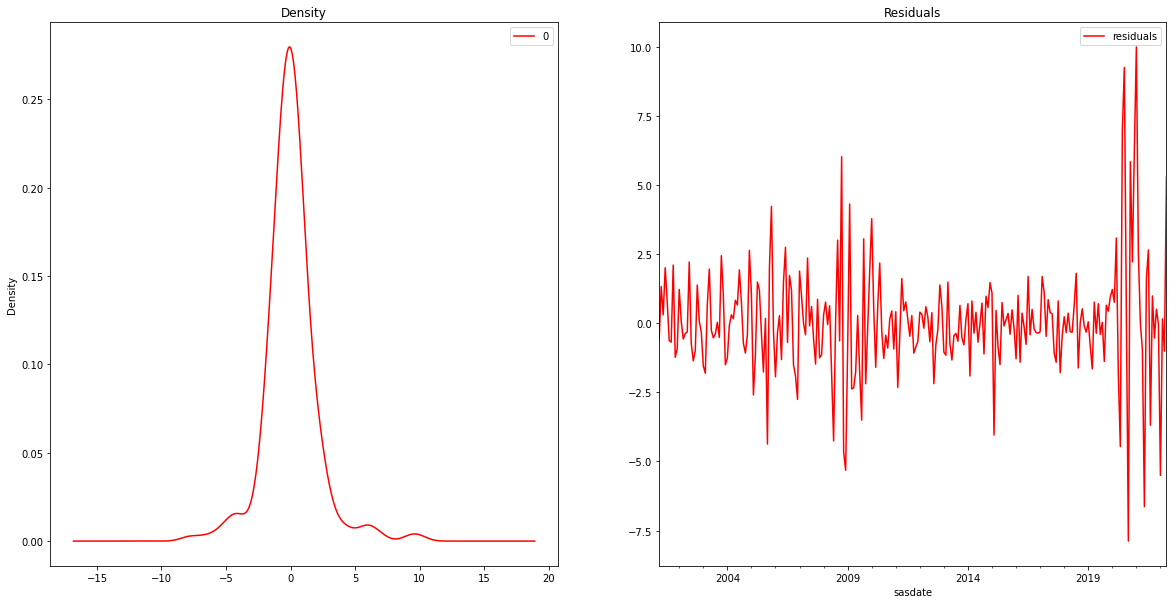

In [38]:
pred_df = pd.DataFrame(predictions)
observed_df = pd.DataFrame(observed)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

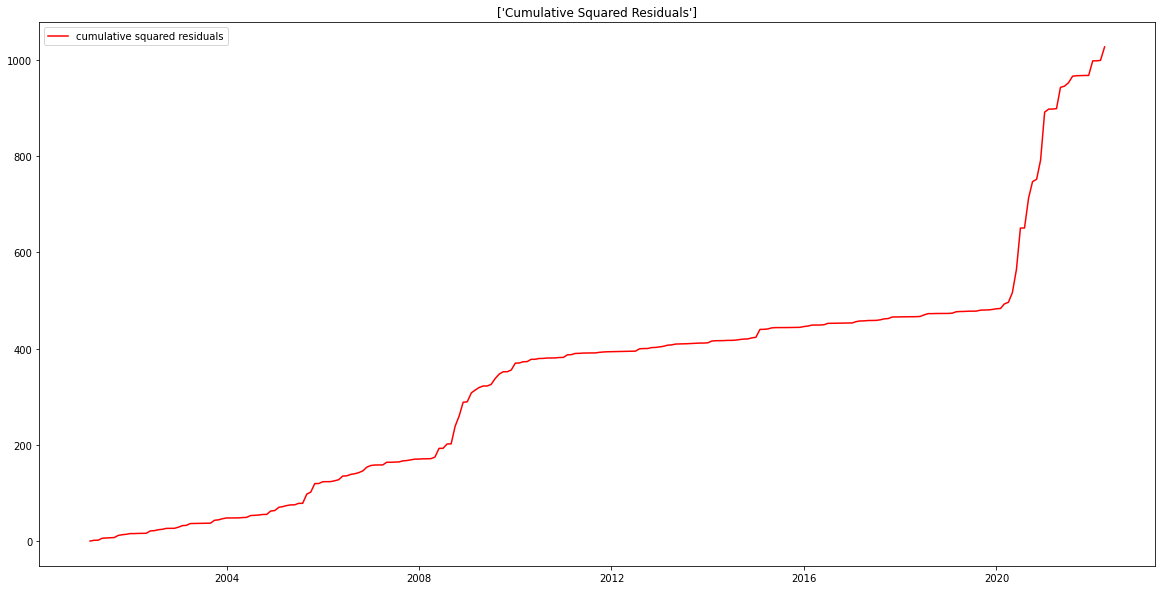

In [39]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [40]:
pred = pd.DataFrame(predictions_real)
observedd = pd.DataFrame(observed_real)

In [41]:
pred.shape, observedd.shape, date.shape

((254, 1), (254, 1), (254, 1))

In [42]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [43]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])
df.head()

,0_x,0_y
sasdate,,
2001-03-01,-0.003375,-0.001705
2001-04-01,0.004696,0.001133
2001-05-01,0.004182,0.003375
2001-06-01,0.002562,-0.002825
2001-07-01,-0.001816,-0.003942


In [44]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-03-01,-0.003375,-0.001705
2001-04-01,0.004696,0.001133
2001-05-01,0.004182,0.003375
2001-06-01,0.002562,-0.002825
2001-07-01,-0.001816,-0.003942


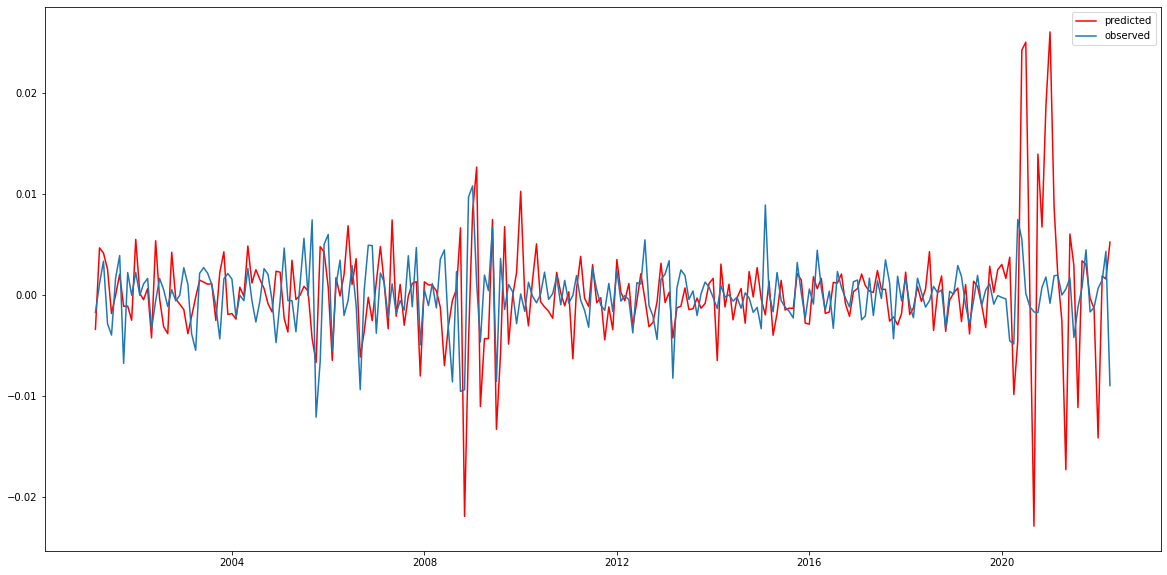

In [45]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

In [46]:
mse = mean_squared_error(observed_real, predictions_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(observed_real, predictions_real)
print('MSE: %f' % mse), print('MAE: %f' % mae), print('RMSE: %f' % rmse)

MSE: 0.000029
MAE: 0.003522
RMSE: 0.005409


(None, None, None)

The Autoregressive Ridge Model seems to be more accurate than the AR and the Autoregressive PCR Model, however, it makes large errors during the pandemic period, possibly because the explanatory variables referring to the economy have presented unusual values. In addition, it is also possible to observe a jump in the errors accumulated in the period of 2008 and 2020, that is, the period of the international financial crisis and pandemic, respectively. The Ridge had an MSE of 2.67, RMSE of 1.63 and an MAE of 0.99.

In [47]:
pred_ridge = df["pred"].copy()
pred_ridge.head()

sasdate
2001-03-01   -0.003375
2001-04-01    0.004696
2001-05-01    0.004182
2001-06-01    0.002562
2001-07-01   -0.001816
Name: pred, dtype: float64

In [48]:
pred_ridge.shape

(254,)

In [49]:
pred_ridge.to_csv("/content/drive/MyDrive/Trabalho-1/pred_ridge.csv", index = False)

<h3> b) <h3>

In [50]:
df_importances = pd.DataFrame(importance_agg, columns = cols_names)
df_importances.head()

RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO   IPFPNSS  \
0 -0.007989 -0.007053         0.079929 -0.006157 -0.001142  0.019457   
1 -0.007438 -0.006593         0.078908 -0.004938 -0.000722  0.018892   
2 -0.006681 -0.010265         0.081223 -0.008836  0.000767  0.019892   
3 -0.006769 -0.009672         0.082116 -0.010087  0.000559  0.019615   
4 -0.006644 -0.007047         0.087112 -0.009963 -0.001492  0.017526   

    IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT    IPDMAT  \
0 -0.000894 -0.043024 -0.062199  0.054151  0.019986 -0.018322  0.029198   
1 -0.000942 -0.041937 -0.060773  0.054222  0.018866 -0.017205  0.029851   
2  0.000863 -0.039432 -0.059047  0.050690  0.016750 -0.015498  0.030598   
3  0.000425 -0.039890 -0.059101  0.050545  0.017645 -0.015659  0.029905   
4  0.000337 -0.040822 -0.057880  0.047886  0.020620 -0.018736  0.023598   

     IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV    CE16OV  \
0 -0.040313  -0.009230   0.083027 -0.022416 -0.001715  0.011233  0.002663   
1 -0.037554  -0.008958   0.083606 -0.023302 -0.001110  0.010654  0.002255   
2 -0.041228  -0.010577   0.094618 -0.024332 -0.002923  0.020580  0.003975   
3 -0.041649  -0.010687   0.094201 -0.023784 -0.003062  0.021265  0.004347   
4 -0.042518  -0.010899   0.099874 -0.018763 -0.003660  0.024076  0.003995   

     UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  UEMP27OV  \
0  0.007952  0.064750  0.038492   0.067867 -0.032231  -0.041561 -0.084924   
1  0.008233  0.064180  0.039412   0.067397 -0.031424  -0.041146 -0.084180   
2  0.008885  0.065542  0.036120   0.062552 -0.030747  -0.041161 -0.086512   
3  0.008752  0.066037  0.036825   0.061713 -0.030912  -0.040661 -0.086927   
4  0.010098  0.068214  0.041206   0.061256 -0.032800  -0.043441 -0.081476   

    CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP   DMANEMP  \
0  0.006409 -0.004137  0.006591       0.030327  0.057153  0.001483  0.017065   
1  0.007140 -0.004258  0.006456       0.030620  0.055830  0.001827  0.017156   
2  0.008882 -0.002725  0.007610       0.033620  0.068400  0.001630  0.020054   
3  0.008641 -0.002729  0.007812       0.033835  0.066482  0.002078  0.020565   
4  0.007438 -0.002528  0.006120       0.038232  0.065237  0.001168  0.019554   

   NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE    USGOVT  \
0 -0.036139 -0.007206 -0.026355  0.007529 -0.011849 -0.035950  0.001538   
1 -0.035363 -0.007399 -0.025842  0.007674 -0.011584 -0.035113  0.002788   
2 -0.042311 -0.006530 -0.025582  0.012722 -0.008809 -0.025722 -0.013642   
3 -0.042191 -0.006425 -0.024578  0.012917 -0.008651 -0.024656 -0.014404   
4 -0.043977 -0.005260 -0.018991  0.020290 -0.005851 -0.019326 -0.012145   

   CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW    HOUSTS  \
0       0.004083  0.008743 -0.000622 -0.002466  0.010030  0.010277 -0.014476   
1       0.003568  0.006921 -0.000094 -0.002224  0.008820  0.009744 -0.012428   
2       0.001348  0.010824 -0.001689 -0.004383  0.011751  0.004226 -0.013339   
3       0.002223  0.009045 -0.001083 -0.004325  0.011707  0.004657 -0.013545   
4       0.007512  0.005487  0.003169 -0.007117  0.011848  0.001976 -0.018804   

     HOUSTW   AMDMNOx   AMDMUOx          M1SL      M2SL    M2REAL  BOGMBASE  \
0 -0.000461  0.041565 -0.096975  4.280456e-07 -0.004027  0.118171  0.000625   
1 -0.001437  0.041008 -0.095305  4.297016e-07 -0.003578  0.119776  0.000603   
2 -0.002691  0.040375 -0.094572  4.361086e-07 -0.005051  0.118778  0.000581   
3 -0.002271  0.040980 -0.096806  4.429701e-07 -0.005259  0.118059  0.000596   
4  0.000848  0.046461 -0.091604  4.349747e-07 -0.004465  0.136828  0.000478   

   TOTRESNS     NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
0 -0.000106  9.591239e-09  0.008241  0.008298  0.016160     0.041403   
1 -0.000110  8.973528e-09  0.008476  0.008868  0.016422     0.042277   
2 -0.000084  7.404267e-09  0.008764  0.007104  0.018973     0.046168   
3 -0.000084  7.091042e

In [51]:
df_importances.shape

(254, 1351)

In [52]:
df_rel_importances = df_importances.copy()
df_rel_importances["sum"] = df_rel_importances.abs().sum(axis = 1)
df_rel_importances["sum"].head()

0    34.455673
1    34.378898
2    34.261093
3    34.226143
4    34.124374
Name: sum, dtype: float64

In [53]:
df_rel_importances.head()

RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO   IPFPNSS  \
0 -0.007989 -0.007053         0.079929 -0.006157 -0.001142  0.019457   
1 -0.007438 -0.006593         0.078908 -0.004938 -0.000722  0.018892   
2 -0.006681 -0.010265         0.081223 -0.008836  0.000767  0.019892   
3 -0.006769 -0.009672         0.082116 -0.010087  0.000559  0.019615   
4 -0.006644 -0.007047         0.087112 -0.009963 -0.001492  0.017526   

    IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT    IPDMAT  \
0 -0.000894 -0.043024 -0.062199  0.054151  0.019986 -0.018322  0.029198   
1 -0.000942 -0.041937 -0.060773  0.054222  0.018866 -0.017205  0.029851   
2  0.000863 -0.039432 -0.059047  0.050690  0.016750 -0.015498  0.030598   
3  0.000425 -0.039890 -0.059101  0.050545  0.017645 -0.015659  0.029905   
4  0.000337 -0.040822 -0.057880  0.047886  0.020620 -0.018736  0.023598   

     IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV    CE16OV  \
0 -0.040313  -0.009230   0.083027 -0.022416 -0.001715  0.011233  0.002663   
1 -0.037554  -0.008958   0.083606 -0.023302 -0.001110  0.010654  0.002255   
2 -0.041228  -0.010577   0.094618 -0.024332 -0.002923  0.020580  0.003975   
3 -0.041649  -0.010687   0.094201 -0.023784 -0.003062  0.021265  0.004347   
4 -0.042518  -0.010899   0.099874 -0.018763 -0.003660  0.024076  0.003995   

     UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  UEMP27OV  \
0  0.007952  0.064750  0.038492   0.067867 -0.032231  -0.041561 -0.084924   
1  0.008233  0.064180  0.039412   0.067397 -0.031424  -0.041146 -0.084180   
2  0.008885  0.065542  0.036120   0.062552 -0.030747  -0.041161 -0.086512   
3  0.008752  0.066037  0.036825   0.061713 -0.030912  -0.040661 -0.086927   
4  0.010098  0.068214  0.041206   0.061256 -0.032800  -0.043441 -0.081476   

    CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP   DMANEMP  \
0  0.006409 -0.004137  0.006591       0.030327  0.057153  0.001483  0.017065   
1  0.007140 -0.004258  0.006456       0.030620  0.055830  0.001827  0.017156   
2  0.008882 -0.002725  0.007610       0.033620  0.068400  0.001630  0.020054   
3  0.008641 -0.002729  0.007812       0.033835  0.066482  0.002078  0.020565   
4  0.007438 -0.002528  0.006120       0.038232  0.065237  0.001168  0.019554   

   NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE    USGOVT  \
0 -0.036139 -0.007206 -0.026355  0.007529 -0.011849 -0.035950  0.001538   
1 -0.035363 -0.007399 -0.025842  0.007674 -0.011584 -0.035113  0.002788   
2 -0.042311 -0.006530 -0.025582  0.012722 -0.008809 -0.025722 -0.013642   
3 -0.042191 -0.006425 -0.024578  0.012917 -0.008651 -0.024656 -0.014404   
4 -0.043977 -0.005260 -0.018991  0.020290 -0.005851 -0.019326 -0.012145   

   CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW    HOUSTS  \
0       0.004083  0.008743 -0.000622 -0.002466  0.010030  0.010277 -0.014476   
1       0.003568  0.006921 -0.000094 -0.002224  0.008820  0.009744 -0.012428   
2       0.001348  0.010824 -0.001689 -0.004383  0.011751  0.004226 -0.013339   
3       0.002223  0.009045 -0.001083 -0.004325  0.011707  0.004657 -0.013545   
4       0.007512  0.005487  0.003169 -0.007117  0.011848  0.001976 -0.018804   

     HOUSTW   AMDMNOx   AMDMUOx          M1SL      M2SL    M2REAL  BOGMBASE  \
0 -0.000461  0.041565 -0.096975  4.280456e-07 -0.004027  0.118171  0.000625   
1 -0.001437  0.041008 -0.095305  4.297016e-07 -0.003578  0.119776  0.000603   
2 -0.002691  0.040375 -0.094572  4.361086e-07 -0.005051  0.118778  0.000581   
3 -0.002271  0.040980 -0.096806  4.429701e-07 -0.005259  0.118059  0.000596   
4  0.000848  0.046461 -0.091604  4.349747e-07 -0.004465  0.136828  0.000478   

   TOTRESNS     NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
0 -0.000106  9.591239e-09  0.008241  0.008298  0.016160     0.041403   
1 -0.000110  8.973528e-09  0.008476  0.008868  0.016422     0.042277   
2 -0.000084  7.404267e-09  0.008764  0.007104  0.018973     0.046168   
3 -0.000084  7.091042e

The importances are transformed to percentages.

In [54]:
for col in df_rel_importances.columns[:-1]:
  df_rel_importances[col] = (df_rel_importances[col].abs()*100)/df_rel_importances["sum"]
df_rel_importances.head()

RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO   IPFPNSS  \
0  0.023186  0.020470         0.231977  0.017869  0.003314  0.056469   
1  0.021635  0.019179         0.229524  0.014364  0.002099  0.054953   
2  0.019500  0.029960         0.237071  0.025789  0.002237  0.058059   
3  0.019777  0.028258         0.239922  0.029472  0.001633  0.057310   
4  0.019471  0.020652         0.255279  0.029196  0.004372  0.051358   

    IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT    IPDMAT  \
0  0.002594  0.124868  0.180519  0.157161  0.058004  0.053175  0.084739   
1  0.002739  0.121984  0.176775  0.157717  0.054878  0.050046  0.086829   
2  0.002517  0.115093  0.172345  0.147953  0.048890  0.045235  0.089307   
3  0.001243  0.116549  0.172679  0.147681  0.051553  0.045751  0.087376   
4  0.000987  0.119626  0.169615  0.140329  0.060426  0.054905  0.069153   

     IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV    CE16OV  \
0  0.117000   0.026788   0.240967  0.065059  0.004977  0.032601  0.007729   
1  0.109236   0.026058   0.243190  0.067779  0.003227  0.030990  0.006560   
2  0.120333   0.030873   0.276168  0.071020  0.008533  0.060069  0.011601   
3  0.121688   0.031224   0.275230  0.069489  0.008945  0.062132  0.012700   
4  0.124597   0.031938   0.292676  0.054983  0.010727  0.070554  0.011707   

     UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  UEMP27OV  \
0  0.023078  0.187923  0.111714   0.196968  0.093544   0.120621  0.246473   
1  0.023949  0.186685  0.114641   0.196043  0.091405   0.119684  0.244860   
2  0.025933  0.191300  0.105426   0.182576  0.089743   0.120139  0.252507   
3  0.025570  0.192943  0.107594   0.180309  0.090316   0.118802  0.253979   
4  0.029592  0.199898  0.120751   0.179507  0.096118   0.127302  0.238760   

    CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP   DMANEMP  \
0  0.018601  0.012007  0.019130       0.088016  0.165874  0.004304  0.049527   
1  0.020767  0.012386  0.018780       0.089066  0.162397  0.005314  0.049903   
2  0.025925  0.007955  0.022213       0.098128  0.199643  0.004759  0.058532   
3  0.025247  0.007974  0.022826       0.098858  0.194243  0.006073  0.060087   
4  0.021796  0.007408  0.017933       0.112037  0.191175  0.003422  0.057302   

   NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE    USGOVT  \
0  0.104886  0.020914  0.076488  0.021851  0.034389  0.104338  0.004465   
1  0.102862  0.021522  0.075169  0.022323  0.033696  0.102135  0.008108   
2  0.123497  0.019059  0.074666  0.037134  0.025712  0.075076  0.039819   
3  0.123270  0.018773  0.071811  0.037741  0.025276  0.072040  0.042086   
4  0.128873  0.015415  0.055651  0.059459  0.017147  0.056635  0.035591   

   CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW    HOUSTS  \
0       0.011851  0.025375  0.001804  0.007156  0.029111  0.029827  0.042015   
1       0.010378  0.020131  0.000274  0.006469  0.025655  0.028344  0.036151   
2       0.003933  0.031592  0.004929  0.012793  0.034298  0.012335  0.038935   
3       0.006496  0.026428  0.003165  0.012636  0.034205  0.013607  0.039575   
4       0.022014  0.016079  0.009285  0.020855  0.034719  0.005789  0.055103   

     HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  BOGMBASE  \
0  0.001338  0.120633  0.281450  0.000001  0.011688  0.342966  0.001813   
1  0.004180  0.119284  0.277219  0.000001  0.010407  0.348401  0.001755   
2  0.007853  0.117846  0.276033  0.000001  0.014744  0.346685  0.001696   
3  0.006635  0.119734  0.282842  0.000001  0.015366  0.344938  0.001743   
4  0.002485  0.136151  0.268442  0.000001  0.013085  0.400968  0.001401   

   TOTRESNS     NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
0  0.000307  2.783646e-08  0.023918  0.024082  0.046900     0.120163   
1  0.000321  2.610185e-08  0.024656  0.025794  0.047766     0.122972   
2  0.000246  2.161130e-08  0.025580  0.020736  0.055378     0.134754   
3  0.000244  2.071821e-08  0.025432  0.018881 

In [55]:
df_rel_importances["test"] = df_rel_importances.sum(axis = 1) - df_rel_importances["sum"]
df_rel_importances["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

In [56]:
df_rel_importances.shape

(254, 1353)

In [57]:
df_rel_importances = df_rel_importances.drop(columns = ["sum", "test"])
df_rel_importances.shape

(254, 1351)

In [58]:
group_1 = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "NAPMPI", "CUMFNS"]

group_2 = ["HWI", "HWIURATIO", "CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN", "NAPMEI",
           "CES0600000008", "CES2000000008", "CES3000000008"]

group_3 = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW", "PERMIT", "PERMITNE", "PERMITMW", "PERMITS", "PERMITW"]

group_4 =  ["DPCERA3M086SBEA", "CMRMTSPLx", "RETAILx", "NAPM", "NAPMNOI", "NAPMSDI", "NAPMII", "ACOGNO", "AMDMNOx",
            "ANDENOx", "AMDMUOx", "BUSINVx", "ISRATIOx", "UMCSENTx"]

group_5 = ["M1SL", "M2SL", "M2REAL", "AMBSL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN", "NONREVSL", "CONSPI", "MZMSL",
           "DTCOLNVHFNM", "DTCTHFNM", "INVEST"] 

group_6 = ["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA", "COMPAPFFx",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM", "TWEXMMTH",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

group_7 = ["PPIFGS", "PPIFCG", "PPIITM", "PPICRM", "OILPRICEx", "PPICMM", "NAPMPRI", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

group_8 = ["S&P 500", "S&P: indust", "S&P div yield", "S&P PE ratio"] 

group_9 = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11", "CPIAUCSL_diff_lag_12"]

In [59]:
len(group_1 + group_2 + group_3 + group_4 + group_5 +  group_6 +  group_7 + group_8 + group_9)

145

Na's variables dropped in the first notebook (AR model).

In [60]:
na_cols = ['CMRMTSPLx',
 'HWI',
 'HWIURATIO',
 'PERMIT',
 'PERMITNE',
 'PERMITMW',
 'PERMITS',
 'PERMITW',
 'ACOGNO',
 'ANDENOx',
 'BUSINVx',
 'ISRATIOx',
 'NONREVSL',
 'CONSPI',
 'S&P div yield',
 'S&P PE ratio',
 'CP3Mx',
 'COMPAPFFx',
 'TWEXAFEGSMTHx',
 'UMCSENTx',
 'DTCOLNVHFNM',
 'DTCTHFNM',
 'VIXCLSx']

In [61]:
len(na_cols)

23

In [62]:
df_rel_importances.shape

(254, 1351)

Now, we aggregate the lags into the original variables. Remembering that as the variables are standardized in percentage of importance, their sum indicates the percentage of importance of the original variable and its lags.

In [63]:
lags_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_agg_lags = df_rel_importances.copy()
for col in df_agg_lags.columns[0: 103]:
  for i in lags_range:
    df_agg_lags[col] = df_agg_lags[col] + df_agg_lags[col + "_lag_" + str(i)]
    df_agg_lags = df_agg_lags.drop(columns = [col + "_lag_" + str(i)])

In [64]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12
0,0.419734,1.125721,1.082679,0.851158,0.742402,0.565800,0.345498,0.616564,0.940221,1.427257,0.664260,1.078912,1.034884,1.003572,0.800468,1.019437,1.388241,0.966742,1.146397,0.333497,0.350380,0.856563,0.717967,1.183745,0.635223,0.814879,1.168874,0.604067,0.274492,0.502278,1.447568,1.013798,0.770792,1.190665,0.973455,0.235555,0.494487,1.498232,0.407189,1.144033,1.693064,0.765976,1.170886,0.709469,0.282276,0.873874,0.838745,0.775582,1.069192,1.192855,1.871040,0.000009,0.192474,1.739231,0.021437,0.004906,1.336040e-01,0.224040,1.227846,0.655944,0.958270,1.319756,1.534750,1.604158,1.159584,1.496974,1.261318,1.614722,0.908259,0.905810,0.743633,0.778342,0.381466,0.335149,0.373978,0.224588,0.673455,1.674724,1.430964,0.914171,1.004898,0.983858,0.972181,0.896992,1.709355,1.112861,0.782055,0.198961,1.967673,0.372873,0.869078,2.068989,1.695095,0.583885,1.474502,1.253674,1.916952,0.564686,1.250114,1.645959,2.437288,1.464615,1.144325,0.849221,0.305990,0.355758,0.027101,0.010811,0.171374,0.016973,0.098423,0.016854,0.008144,0.165686,0.028584
1,0.419598,1.127251,1.082380,0.839424,0.736573,0.566511,0.342951,0.607081,0.913589,1.431786,0.662491,1.080665,1.043087,0.993332,0.801630,1.033573,1.411470,0.968939,1.142757,0.337814,0.359679,0.839528,0.722054,1.191220,0.642260,0.824919,1.184009,0.620163,0.276898,0.501185,1.447982,1.002733,0.776329,1.187159,0.964185,0.239793,0.505111,1.488771,0.401725,1.157161,1.707495,0.766119,1.155687,0.692626,0.281479,0.900049,0.833105,0.774259,1.085363,1.194772,1.886643,0.000009,0.194818,1.760439,0.021877,0.004945,5.642127e-07,0.224481,1.236895,0.655197,0.970204,1.307973,1.531623,1.612161,1.144496,1.551328,1.258315,1.612207,0.908363,0.889689,0.734426,0.775187,0.381279,0.334552,0.378192,0.225454,0.672700,1.670455,1.423381,0.923535,1.011519,0.964253,0.993114,0.849528,1.703248,1.109003,0.768466,0.199200,1.989280,0.373148,0.865908,2.108805,1.708410,0.589258,1.483391,1.233643,1.912205,0.555903,1.230049,1.644635,2.456443,1.496932,1.144146,0.849670,0.293869,0.354966,0.023031,0.008482,0.173683,0.009599,0.105048,0.024550,0.012903,0.167946,0.028226
2,0.438066,1.166434,1.050039,0.875140,0.751406,0.582562,0.344339,0.605782,0.893304,1.493835,0.656756,1.026206,1.065473,0.999250,0.767892,1.099364,1.422032,0.926760,1.130304,0.323955,0.366711,0.835543,0.714433,1.104328,0.623254,0.840752,1.212689,0.621725,0.282657,0.538147,1.463420,0.992831,0.817397,1.233886,0.989291,0.255896,0.492026,1.515254,0.413001,1.066745,1.613811,0.757651,1.177825,0.691013,0.323190,0.975756,0.801699,0.840730,1.155664,1.170988,1.946312,0.000009,0.200956,1.703995,0.020126,0.004907,5.566223e-07,0.225857,1.232307,0.687775,0.969383,1.209835,1.494653,1.637342,1.135555,1.502437,1.288699,1.584776,0.890241,0.855557,0.751225,0.717484,0.396383,0.337521,0.374939,0.209177,0.713167,1.709793,1.458900,0.970272,1.053154,1.033966,0.993829,0.885038,1.661954,1.117176,0.731575,0

In [65]:
df_agg_lags.shape

(254, 115)

Adding the columns per row to confirm the total is 100.

In [66]:
df_agg_lags["test"] = df_agg_lags.sum(axis = 1)
df_agg_lags["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

Now, we need to check that the per-group variables provided by the St. Louis match the base variables.

Names of the database variables

In [67]:
data_cols_test = df_agg_lags.columns[0:103]
data_cols_test_df = pd.DataFrame(data_cols_test, columns = ["data"])
data_cols_test_df = data_cols_test_df.reindex(sorted(data_cols_test_df.columns), axis=1)
data_cols_test_df.head()

,data
0,RPI
1,W875RX1
2,DPCERA3M086SBEA
3,RETAILx
4,INDPRO


Name of the per-group variables provided by the Fed

In [68]:
groups_cols = group_1 + group_2 + group_3 + group_4 + group_5 +  group_6 +  group_7 + group_8 + group_9
groups_cols_df = pd.DataFrame(groups_cols, columns = ["groups"])
groups_cols_df = groups_cols_df.reindex(sorted(groups_cols_df.columns), axis=1)
groups_cols_df.head()

,groups
0,RPI
1,W875RX1
2,INDPRO
3,IPFPNSS
4,IPFINAL


In [69]:
mg_left = pd.merge(data_cols_test_df, groups_cols_df[:-12], left_on = "data", right_on = "groups", how = "left")
mg_right = pd.merge(data_cols_test_df, groups_cols_df[:-12], left_on = "data", right_on = "groups", how = "right")

In [70]:
mg_left["test"] = np.where(mg_left["data"] == mg_left["groups"], 1, 0)

In [71]:
mg_right["test"] = np.where(mg_right["data"] == mg_right["groups"], 1, 0)

In [72]:
test_left = mg_left[mg_left["test"] == 0]
test_left.shape

(8, 3)

We have 8 variables in database that doesnt match the Fed groups.

In [73]:
test_right = mg_right[mg_right["test"] == 0]
test_right.shape

(38, 3)

We have 38 variables from the Fed groups that don't match the variable names in the database.

In [74]:
test_left

,data,groups,test
15,IPB51222S,NaN,0
54,BOGMBASE,NaN,0
80,WPSFD49207,NaN,0
81,WPSFD49502,NaN,0
82,WPSID61,NaN,0
83,WPSID62,NaN,0
90,CUSR0000SAD,NaN,0
93,CUSR0000SA0L2,NaN,0


Names of the 8 variables that are in the database and not in the fed groups.

In [75]:
test_right

,data,groups,test
13,NaN,IPB51222s,0
15,NaN,NAPMPI,0
17,NaN,HWI,0
18,NaN,HWIURATIO,0
45,NaN,NAPMEI,0
54,NaN,PERMIT,0
55,NaN,PERMITNE,0
56,NaN,PERMITMW,0
57,NaN,PERMITS,0
58,NaN,PERMITW,0


Names of 38 variables that are in Fed group and not are in Database.

In [76]:
na_cols_df = pd.DataFrame(na_cols, columns = ["Na"])
na_cols_df

,Na
0,CMRMTSPLx
1,HWI
2,HWIURATIO
3,PERMIT
4,PERMITNE
5,PERMITMW
6,PERMITS
7,PERMITW
8,ACOGNO
9,ANDENOx


Above, 22 variables has been dropped in the first notebook (AR). Below we can see the variables that were dropped and that are also in the Fed groups.

In [77]:
test_right_na = pd.merge(test_right, na_cols_df, left_on = "groups", right_on = "Na", how = "left")
test_right_na = test_right_na.drop(columns= ["data", "test"])
test_right_na

,groups,Na
0,IPB51222s,NaN
1,NAPMPI,NaN
2,HWI,HWI
3,HWIURATIO,HWIURATIO
4,NAPMEI,NaN
5,PERMIT,PERMIT
6,PERMITNE,PERMITNE
7,PERMITMW,PERMITMW
8,PERMITS,PERMITS
9,PERMITW,PERMITW


In [78]:
test_right_na["test"] =  np.where(test_right_na["groups"] == test_right_na["Na"], 1, 0)
test_right_na

,groups,Na,test
0,IPB51222s,NaN,0
1,NAPMPI,NaN,0
2,HWI,HWI,1
3,HWIURATIO,HWIURATIO,1
4,NAPMEI,NaN,0
5,PERMIT,PERMIT,1
6,PERMITNE,PERMITNE,1
7,PERMITMW,PERMITMW,1
8,PERMITS,PERMITS,1
9,PERMITW,PERMITW,1


In [79]:
test_right_no_na = test_right_na[test_right_na["test"] == 0]
test_right_no_na

,groups,Na,test
0,IPB51222s,NaN,0
1,NAPMPI,NaN,0
4,NAPMEI,NaN,0
11,NAPM,NaN,0
12,NAPMNOI,NaN,0
13,NAPMSDI,NaN,0
14,NAPMII,NaN,0
20,AMBSL,NaN,0
23,MZMSL,NaN,0
28,TWEXMMTH,NaN,0


These are the variables for the Fed groups that are not actually in the database.

In [80]:
test_left = test_left.drop(columns = ["groups", "test"])
test_left

,data
15,IPB51222S
54,BOGMBASE
80,WPSFD49207
81,WPSFD49502
82,WPSID61
83,WPSID62
90,CUSR0000SAD
93,CUSR0000SA0L2


We can see that some variables that are in the base are with different names from the variables of the groups, let's change these names, for the others we will create a tenth group.

In [81]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,test
0,0.419734,1.125721,1.082679,0.851158,0.742402,0.565800,0.345498,0.616564,0.940221,1.427257,0.664260,1.078912,1.034884,1.003572,0.800468,1.019437,1.388241,0.966742,1.146397,0.333497,0.350380,0.856563,0.717967,1.183745,0.635223,0.814879,1.168874,0.604067,0.274492,0.502278,1.447568,1.013798,0.770792,1.190665,0.973455,0.235555,0.494487,1.498232,0.407189,1.144033,1.693064,0.765976,1.170886,0.709469,0.282276,0.873874,0.838745,0.775582,1.069192,1.192855,1.871040,0.000009,0.192474,1.739231,0.021437,0.004906,1.336040e-01,0.224040,1.227846,0.655944,0.958270,1.319756,1.534750,1.604158,1.159584,1.496974,1.261318,1.614722,0.908259,0.905810,0.743633,0.778342,0.381466,0.335149,0.373978,0.224588,0.673455,1.674724,1.430964,0.914171,1.004898,0.983858,0.972181,0.896992,1.709355,1.112861,0.782055,0.198961,1.967673,0.372873,0.869078,2.068989,1.695095,0.583885,1.474502,1.253674,1.916952,0.564686,1.250114,1.645959,2.437288,1.464615,1.144325,0.849221,0.305990,0.355758,0.027101,0.010811,0.171374,0.016973,0.098423,0.016854,0.008144,0.165686,0.028584,100.0
1,0.419598,1.127251,1.082380,0.839424,0.736573,0.566511,0.342951,0.607081,0.913589,1.431786,0.662491,1.080665,1.043087,0.993332,0.801630,1.033573,1.411470,0.968939,1.142757,0.337814,0.359679,0.839528,0.722054,1.191220,0.642260,0.824919,1.184009,0.620163,0.276898,0.501185,1.447982,1.002733,0.776329,1.187159,0.964185,0.239793,0.505111,1.488771,0.401725,1.157161,1.707495,0.766119,1.155687,0.692626,0.281479,0.900049,0.833105,0.774259,1.085363,1.194772,1.886643,0.000009,0.194818,1.760439,0.021877,0.004945,5.642127e-07,0.224481,1.236895,0.655197,0.970204,1.307973,1.531623,1.612161,1.144496,1.551328,1.258315,1.612207,0.908363,0.889689,0.734426,0.775187,0.381279,0.334552,0.378192,0.225454,0.672700,1.670455,1.423381,0.923535,1.011519,0.964253,0.993114,0.849528,1.703248,1.109003,0.768466,0.199200,1.989280,0.373148,0.865908,2.108805,1.708410,0.589258,1.483391,1.233643,1.912205,0.555903,1.230049,1.644635,2.456443,1.496932,1.144146,0.849670,0.293869,0.354966,0.023031,0.008482,0.173683,0.009599,0.105048,0.024550,0.012903,0.167946,0.028226,100.0
2,0.438066,1.166434,1.050039,0.875140,0.751406,0.582562,0.344339,0.605782,0.893304,1.493835,0.656756,1.026206,1.065473,0.999250,0.767892,1.099364,1.422032,0.926760,1.130304,0.323955,0.366711,0.835543,0.714433,1.104328,0.623254,0.840752,1.212689,0.621725,0.282657,0.538147,1.463420,0.992831,0.817397,1.233886,0.989291,0.255896,0.492026,1.515254,0.413001,1.066745,1.613811,0.757651,1.177825,0.691013,0.323190,0.975756,0.801699,0.840730,1.155664,1.170988,1.946312,0.000009,0.200956,1.703995,0.020126,0.004907,5.566223e-07,0.225857,1.232307,0.687775,0.969383,1.209835,1.494653,1.637342,1.135555,1.502437,1.288699,1.584776,0.890241,0.855557,0.751225,0.717484,0.396383,0.337521,0.374939,0.209177,0.713167,1.709793,1.458900,0.970272,1.053154,1.033966,0.993829,0.885038,1.661954,1.

In [82]:
df_agg_lags = df_agg_lags.rename(columns = {"IPB51222S" : "IPB51222s", "CUSR0000SAD" : "CUUR0000SAD", "CUSR0000SA0L2" : "CUUR0000SA0L2"})

Now, we need drop variables names in groups that are in the Fed groups and are not in the database.

In [83]:
test_right.head()

,data,groups,test
13,NaN,IPB51222s,0
15,NaN,NAPMPI,0
17,NaN,HWI,0
18,NaN,HWIURATIO,0
45,NaN,NAPMEI,0


In [84]:
variables_to_drop = test_right.drop(columns = ["test", "data"])
variables_to_drop = variables_to_drop.reset_index(drop = True)
variables_to_drop

,groups
0,IPB51222s
1,NAPMPI
2,HWI
3,HWIURATIO
4,NAPMEI
5,PERMIT
6,PERMITNE
7,PERMITMW
8,PERMITS
9,PERMITW


In [85]:
variables_to_drop = variables_to_drop.drop(labels = [0,34,35], axis = 0)
variables_to_drop

,groups
1,NAPMPI
2,HWI
3,HWIURATIO
4,NAPMEI
5,PERMIT
6,PERMITNE
7,PERMITMW
8,PERMITS
9,PERMITW
10,CMRMTSPLx


Here are the updated groups. In which the variables that were in the Fed and were not in the database had their names excluded. The variables that were dropped in the first notebook because they had null values also had their names excluded. Variables that were under different names were updated in the base and those that were in the base and were not in the Fed were included in a tenth group.

In [86]:
Output_and_Income = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "CUMFNS"]

Labor_Market = ["CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN",
           "CES0600000008", "CES2000000008", "CES3000000008"]

Consumption_and_Orders = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW"]

Orders_and_Inventories =  ["DPCERA3M086SBEA", "RETAILx", "AMDMNOx",
            "AMDMUOx"]

Money_and_Credit = ["M1SL", "M2SL", "M2REAL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN",
           "INVEST"] 

Interest_and_Exhange = ["FEDFUNDS", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

Prices = ["OILPRICEx", "PPICMM", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

Stock_Market = ["S&P 500", "S&P: indust"] 

Lags_CPI = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11", "CPIAUCSL_diff_lag_12"]

Others = ["BOGMBASE", "WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62"]

In [87]:
groups = [Output_and_Income, Labor_Market, Consumption_and_Orders, Orders_and_Inventories, Money_and_Credit,
          Interest_and_Exhange, Prices, Stock_Market, Lags_CPI, Others]

list_groups = []

for group in groups:
  g = df_agg_lags[group].sum(axis = 1)
  list_groups.append(g)

list_groups_transpose = np.transpose(list_groups)
list_groups_df = pd.DataFrame(list_groups_transpose)
list_groups_df

list_groups_df["test"] = list_groups_df.sum(axis = 1)
list_groups_df

,0,1,2,3,4,5,6,7,8,9,test
0,14.139712,27.651395,3.839670,4.997732,4.666436,19.335802,17.820753,1.614214,2.054920,3.879366,100.0
1,14.140527,27.733371,3.874254,5.003219,4.565733,19.335314,17.829918,1.625401,2.051972,3.840291,100.0
2,14.239462,27.381096,4.097040,5.042479,4.588740,19.237957,17.659195,1.657158,2.110760,3.986112,100.0
3,14.191686,27.391733,4.090061,5.058540,4.592837,19.212844,17.713852,1.654656,2.101729,3.992062,100.0
4,13.881021,27.482746,4.043525,5.054793,4.567850,19.366743,17.883354,1.603339,2.114683,4.001947,100.0
...,...,...,...,...,...,...,...,...,...,...,...
249,14.671342,28.183123,5.291073,4.896598,9.335384,14.875158,14.349096,1.807326,1.906400,4.684500,100.0
250,14.724733,28.194260,5.303544,4.905758,9.349320,14.753844,14.350633,1.812229,1.909187,4.696491,100.0
251,15.039190,27.887573,5.312711,4.973867,9.302240,14.595649,14.357454,1.890657,1.949459,4.691201,100.0
252,15.140779,27.819161,5.281745,4.993403,9.328396,14.409064,14.513170,1.885927,1.949006,4.679349,100.0


Now we are ready to do analysis. This table shows the importance porcentage aggregate by group per estimation. We have 10 groups and 249 estimations.

In [88]:
groups_importances = list_groups_df.drop(columns = ["test"])
groups_importances = groups_importances.rename(columns = {0 : "Output_and_Income", 1 : "Labor_Market", 2 : "Consumption_and_Orders",
                                                          3 : "Orders_and_Inventories", 4 : "Money_and_Credit", 5 : "Interest_and_Exhange",
                                                          6 : "Prices", 7 : "Stock_Market", 8 : "Lags_CPI", 9 : "Others"})
groups_importances.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
0,14.139712,27.651395,3.839670,4.997732,4.666436,19.335802,17.820753,1.614214,2.054920,3.879366
1,14.140527,27.733371,3.874254,5.003219,4.565733,19.335314,17.829918,1.625401,2.051972,3.840291
2,14.239462,27.381096,4.097040,5.042479,4.588740,19.237957,17.659195,1.657158,2.110760,3.986112
3,14.191686,27.391733,4.090061,5.058540,4.592837,19.212844,17.713852,1.654656,2.101729,3.992062
4,13.881021,27.482746,4.043525,5.054793,4.567850,19.366743,17.883354,1.603339,2.114683,4.001947


In [89]:
date.shape, groups_importances.shape

((254, 1), (254, 10))

In [90]:
groups_importances_date = date.merge(groups_importances, left_index = True, right_index = True, how = "left")
groups_importances_date.index = pd.DatetimeIndex(groups_importances_date["sasdate"])
groups_importances_date = groups_importances_date.drop(columns = ["sasdate"])
groups_importances_date.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
sasdate,,,,,,,,,,
2001-03-01,14.139712,27.651395,3.839670,4.997732,4.666436,19.335802,17.820753,1.614214,2.054920,3.879366
2001-04-01,14.140527,27.733371,3.874254,5.003219,4.565733,19.335314,17.829918,1.625401,2.051972,3.840291
2001-05-01,14.239462,27.381096,4.097040,5.042479,4.588740,19.237957,17.659195,1.657158,2.110760,3.986112
2001-06-01,14.191686,27.391733,4.090061,5.058540,4.592837,19.212844,17.713852,1.654656,2.101729,3.992062
2001-07-01,13.881021,27.482746,4.043525,5.054793,4.567850,19.366743,17.883354,1.603339,2.114683,4.001947


In [91]:
groups_importances_date.shape

(254, 10)

In [92]:
groups_importances_date.isna().sum()

Output_and_Income         0
Labor_Market              0
Consumption_and_Orders    0
Orders_and_Inventories    0
Money_and_Credit          0
Interest_and_Exhange      0
Prices                    0
Stock_Market              0
Lags_CPI                  0
Others                    0
dtype: int64

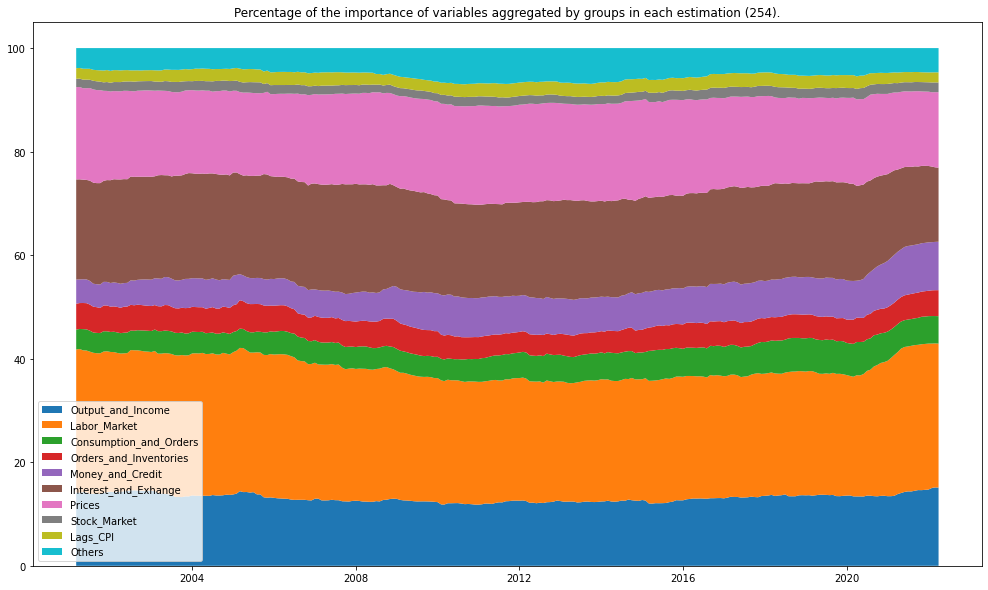

In [93]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(17, 10)

plt.stackplot(groups_importances_date.index, groups_importances_date["Output_and_Income"], groups_importances_date["Labor_Market"], groups_importances_date["Consumption_and_Orders"],
              groups_importances_date["Orders_and_Inventories"], groups_importances_date["Money_and_Credit"], groups_importances_date["Interest_and_Exhange"], groups_importances["Prices"],
              groups_importances_date["Stock_Market"], groups_importances_date["Lags_CPI"], groups_importances_date["Others"], labels = groups_importances.columns)

plt.title('Percentage of the importance of variables aggregated by groups in each estimation (254).')
plt.legend(loc= "lower left")

It is worth noting how the Labor Market group showed a higher percentage importance after the pandemic period.